<a href="https://colab.research.google.com/github/Harshpatel44/ML-A2/blob/master/A2-1%3A55-18-2-20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b><h1><center>Assignment 2</h1></center></b>

In [0]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

<center><h2><b>Part 1</h2></b></center>
<h3>(a) Creating the data set </h3>
<h3>(b) Adding noise function </h3>

below we create dataset 1 ( 2 clusters )

In [0]:
class data_set1:
  def __init__(self):
    self.cov1= [[0.4,0],[0,0.4]]      #covariance for class1
    self.mean1= [-2,-2]               #mean for class 1
    self.cov2=[[0.4,0.0],[0.0,0.4]]   #covariance for class2
    self.mean2=[2,2]                  #mean for class2
  # method to adjust noise
  def noise(self,amt1,amt2=0):             
    n1=(3.5 - 0.4)*(amt1/100) + 0.4  #3.5 is max covariance and 0.4 is min covariance taken for noise
    self.cov1=[[n1,0],[0,n1]]
    if(amt2==0):
      amt2=amt1
    n2=(3.5 - 0.4)*(amt2/100) + 0.4
    self.cov2=[[n2,0],[0,n2]]
    return self.create(self.items)

  #method to create data
  def create(self,items=100):
    self.items=items
    x1, y1 = np.random.multivariate_normal(self.mean1, self.cov1, items).T  #class1
    x2, y2 = np.random.multivariate_normal(self.mean2, self.cov2, items).T  #class2
    #appending both classes to 1 array and also adding another column of labels
    self.d1_data = np.array([x1,y1,np.zeros(x1.shape)+0])  
    self.d1_data=np.append(self.d1_data,[x2,y2,np.zeros(x1.shape)+1],axis=1)
    self.d1_data=self.d1_data.T
    return self.d1_data
  def plot(self):
    plt.figure(figsize=(6,6))
    plt.scatter(self.d1_data[:,0],self.d1_data[:,1],c=self.d1_data[:,2])
    plt.axis([-6,6,-6,6])
    plt.show()

Now we create dataset 2 ( concetric circles dataset)

In [0]:
class data_set2:
  def circle_generation(self,n1=130,n2=130,r1=5,r2=3):
      #circle outer
      a=np.random.random(n1) * 2 * np.pi
      r = r1 * np.sqrt(0.4*np.random.random(n1)+0.6)
      self.x1 = r * np.cos(a)
      self.y1 = r * np.sin(a)
      #circle inner
      a=np.random.random(n2) * 2 * np.pi
      r = r2 * (np.sqrt(np.random.random(n2)))
      self.x2 = r * np.cos(a) 
      self.y2 = r * np.sin(a)
      #creating an array with both classes and with labels
      self.d2_data=np.array([self.x1,self.y1,np.zeros(self.x1.shape)+0])
      self.d2_data=(np.append(self.d2_data,[self.x2,self.y2,np.zeros(self.x1.shape)+1],axis=1)).T    
      return self.d2_data
  #to adjust noise of the dataset
  def noise(self,noise):
    amt=int( np.round( self.d2_data.shape[0]*( noise/100 ) ) )
    arr=np.random.randint(0,self.d2_data.shape[0]/2,amt)
    self.d2_data[arr,2]=1
    arr=np.random.randint(self.d2_data.shape[0]/2,self.d2_data.shape[0],amt)
    self.d2_data[arr,2]=0
    return self.d2_data
  def plot(self):
    figure(figsize=(6,6))
    plt.scatter(self.d2_data[:,0],self.d2_data[:,1],c=self.d2_data[:,2])
    plt.show()

Finally we create 'generateData' function with parameters specified in the assignment to generate data from 2 datasets

In [0]:
def generateData(numExamples,distributionShape,noise,plotting='false'):
    if(distributionShape=='twoClusters'):
      obj1=data_set1()
      obj1.create(numExamples)
      X=obj1.noise(noise,noise)
      if(plotting=='true'):
          obj1.plot()
      return X
    if(distributionShape=='circles'):
      obj2=data_set2()
      obj2.circle_generation(numExamples,numExamples,5,3)   # 5 and 3 is the radius of the outer and inner circle
      X= obj2.noise(noise)
      if(plotting=='true'):
          obj2.plot()
      return X

Plotting both datasets for noise = 0

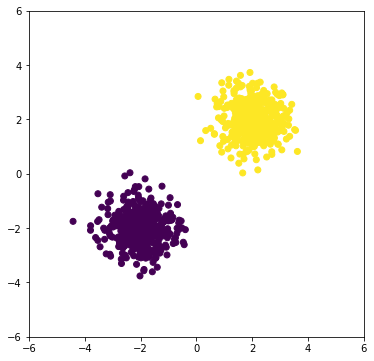

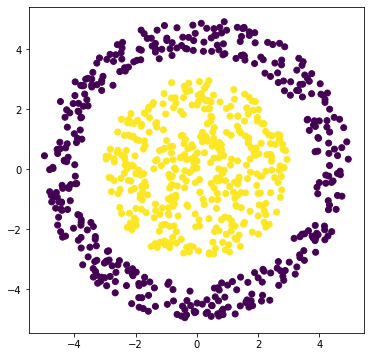

In [171]:
X=generateData(400,'twoClusters',0,'true')
X=generateData(400,'circles',0,'true')

1. Dataset_1 is generated as plotted above ( with noise = 0 % ). Noise can be increased by changing the covariance.
2. Covariance for which noise = 0 % (plotted above) is [ [ 0.4,0 ] , [ 0,0.4 ] ] for both classes.
3. As increasing value in covariance increases noise, range of noise taken is from 0.4 to 3.5 .

Plotting for range of noises [1,10,50,100]

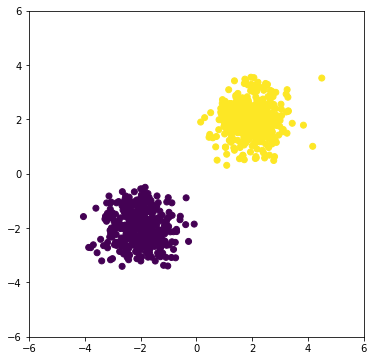

Dataset: twoClusters   Noise: 1


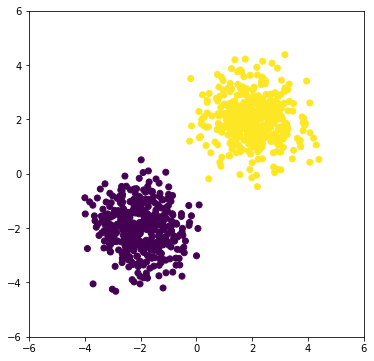

Dataset: twoClusters   Noise: 10


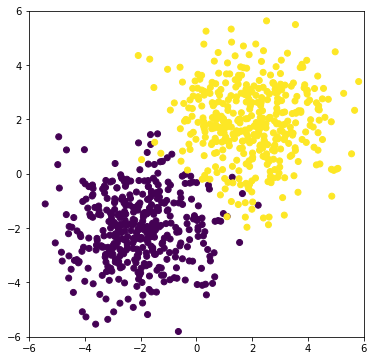

Dataset: twoClusters   Noise: 50


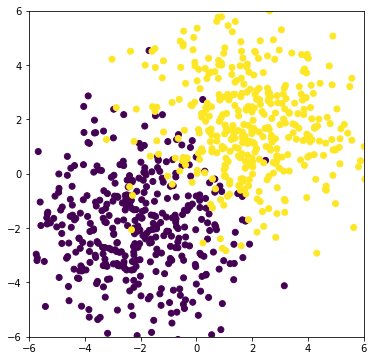

Dataset: twoClusters   Noise: 100


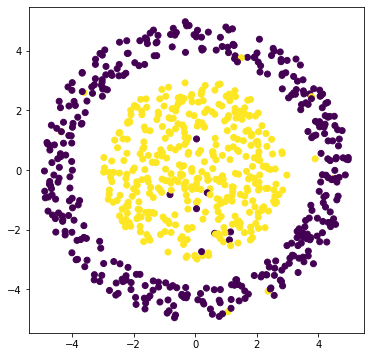

Dataset: circles   Noise: 1


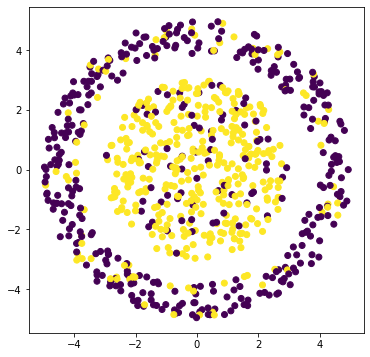

Dataset: circles   Noise: 10


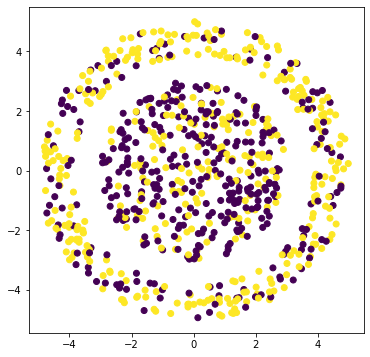

Dataset: circles   Noise: 50


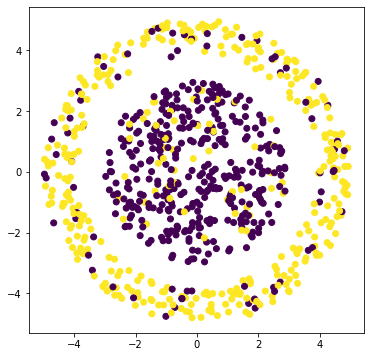

Dataset: circles   Noise: 100


In [484]:
for i in [1,10,50,100]:
  X=generateData(400,'twoClusters',i,'true')
  print('Dataset: twoClusters   Noise:',i)

for i in [1,10,50,100]:
  X=generateData(400,'circles',i,'true')
  print('Dataset: circles   Noise:',i)

Below is a code for plotting decision boundaries

In [0]:
def plot_decision(X,w1,w2,hidden,output,activation):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    ar=np.array([xx.ravel(), yy.ravel()])   
    for i in range(output+1):   # adding column for bias and label for consistency
      ar=np.append(ar,np.zeros((1,ar.shape[1]))+1,axis=0)
    z = net_obj.predict( ar.T,w1,w2,X.shape[1],hidden,output,activation,1)
    z = z[:,0].reshape(xx.shape)
    plt.contourf(xx,yy,z)
    plt.scatter(X[:,0],X[:,1],c=X[:,-1])
    plt.show()


<h3> (c) Training a feedforward neural network </h3>

In [0]:
class neural_net:
  def __init__(self,learning_rate=0.01):
      self.learning_rate=0.01
  def active_func(self,method,z):  #checked
    if method=='relu':
      return np.maximum(0,z)
    if method =="leaky relu":
        return np.maximum(0.01*z,z)  #leaky relu
    if method=='sigmoid':
      return 1/(1+np.exp(-z))
    if method=="tanh":
      return 1
    if method=="softmax":
        return np.exp(z-np.maximum(z))/np.sum(np.exp(z-np.maximum(z)),axis=0)
    #if method=="linear":
    #    np.eye(z.size[0])
  def cross_entropy(self,t,y):
    temp=t* np.log(y+0.00001) + (1-t) * np.log(1 - y +0.00001)     #0.00001 is added so that log does not give nan or inf
    temp=np.around(temp,decimals=3)
    return temp 
  def deriv_activ_fn(self,method,h,t=0):
        if method=='sigmoid':
          return (h * (1 - h))
        if method=="relu":
          return np.where(h>0,1,0)
          #return np.maximum(0,h)
        if method =="leaky relu":
          return np.maximum(0.01*h,h) 
        if method=="tanh":
          return 1
        if method=="softmax":
          temp=h.reshape((-1,1))
          jacobian_matrix=np.diagflat(h) - np.dot(temp,temp.T)
          jacobian_matrix=np.sum(jacobian_matrix,axis=1,keepdims=1)
          deriv=jacobian_matrix.reshape((h.shape[0],h.shape[1]))
          #print(deriv)
          return deriv 
  def check_activation(self,numOutputs):
      if(numOutputs == 1):
        last_activation = "sigmoid"
      if(numOutputs > 1):
        last_activation = "softmax"
      return last_activation
  def train(self,x,numInput,numHiddenUnits,numOutputs,activationType,numIter):
      last_activation=self.check_activation(numOutputs)
      b1=np.random.rand(2)
      b2=np.random.rand(1)  
      np.random.seed(0)   #seed = 0, for practise
      w1=np.random.rand(numInput,numHiddenUnits)
      w2=np.random.rand(numHiddenUnits,numOutputs) 
      entropy=0
      for i in range(0,numIter):
          z1=np.dot(x[:,:-numOutputs],w1) 
          h1=self.active_func(activationType,z1) 
          z2=np.dot(h1,w2)
          y=self.active_func(last_activation,z2)
          t = (x[:,-numOutputs:]).reshape(x.shape[0],numOutputs)
          #loss= 0.5 * np.power((t-y),2)
          loss = t-y
          d=self.deriv_activ_fn(last_activation,y)
          y_ = np.multiply(loss,d)
          w2_=np.dot(h1.T,y_)
          h_=np.dot(y_,w2.T)
          z_=np.multiply(h_,self.deriv_activ_fn(activationType,h1))
          w1_ = np.dot(x[:,:-numOutputs].T,z_)
          w2 = w2 + self.learning_rate*w2_
          w1 = w1 + self.learning_rate*w1_
      return w1,w2
  def predict(self,x,w1,w2,numInput,numHiddenUnits,numOutputs,activationType,verbosity):      
    last_activation=self.check_activation(numOutputs)
    z1=np.dot(x[:,:-numOutputs],w1)
    h1=self.active_func(activationType,z1) 
    z2=np.dot(h1,w2)
    y=self.active_func(last_activation,z2)
    #y=np.around(y,decimals=1)
    y=np.where(y>0.5,1.,0.)
    cr_entropy=self.cross_entropy(x[:,-numOutputs:],y)
    #print(x[:,-numOutputs:])
    ret_array= np.append(y,cr_entropy,axis=1)
    # ret_array[:,0]=np.round(ret_array[:,0])
    return ret_array
  def accuracy(self,y,t):                        #finding accuracy of the model 
    acc = (np.count_nonzero((y-t)==0)) / y.shape[0]
    return acc

Executing the algorithm 

In [0]:
#XOR input
X = np.array([ [0,0,1],[0,1,1],[1,0,1],[1,1,1] ],dtype='float64')
#t = np.array([[1,0,0,1],[0,1,1,0]]).T
t = np.array([[0,1,1,0]],dtype='float64').T
X = np.append(X,t,axis = 1)

In [537]:
X=generateData(80,'twoClusters',100,'false')
X=np.insert(X,2,1,axis=1)
net_obj = neural_net(1)
w1,w2=net_obj.train(X,3,4,1,'sigmoid',50000)
ret_array=net_obj.predict(X,w1,w2,3,4,1,'sigmoid',1)
acc=net_obj.accuracy(ret_array[:,0],X[:,-1])

print("Weights: \n",w1,w2)
print("\nAccuracy: ",acc)
print("\nArray with output and cross-entropy loss: \n",ret_array)

Weights: 
 [[ 5.86471004 -9.56931072 -5.71824316  1.29926589]
 [ 1.99314179  3.24638172  0.58740882  1.72297086]
 [10.69243623 -6.42124998  9.58036108 -2.26658833]] [[  9.69493193]
 [  8.24728557]
 [-12.9756697 ]
 [  6.60258946]]

Accuracy:  0.96875

Array with output and cross-entropy loss: 
 [[  0.      0.   ]
 [  0.      0.   ]
 [  0.      0.   ]
 [  0.      0.   ]
 [  0.      0.   ]
 [  0.      0.   ]
 [  0.      0.   ]
 [  0.      0.   ]
 [  0.      0.   ]
 [  0.      0.   ]
 [  0.      0.   ]
 [  0.      0.   ]
 [  0.      0.   ]
 [  0.      0.   ]
 [  0.      0.   ]
 [  0.      0.   ]
 [  0.      0.   ]
 [  0.      0.   ]
 [  0.      0.   ]
 [  0.      0.   ]
 [  0.      0.   ]
 [  0.      0.   ]
 [  0.      0.   ]
 [  0.      0.   ]
 [  0.      0.   ]
 [  0.      0.   ]
 [  0.      0.   ]
 [  0.      0.   ]
 [  0.      0.   ]
 [  0.      0.   ]
 [  0.      0.   ]
 [  0.      0.   ]
 [  0.      0.   ]
 [  0.      0.   ]
 [  0.      0.   ]
 [  0.      0.   ]
 [  0.      0.   ]
 [

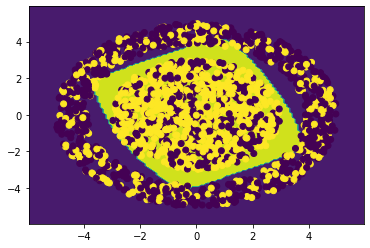

Training Accuracy:  0.674
Activation function: sigmoid


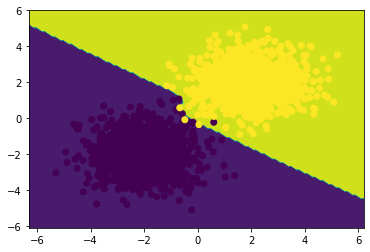

Training Accuracy:  0.998
Activation function: sigmoid


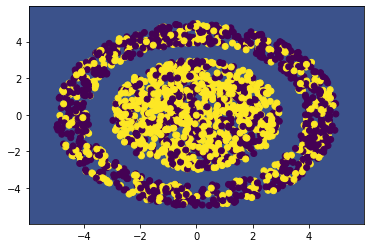

Training Accuracy:  0.5015
Activation function: relu


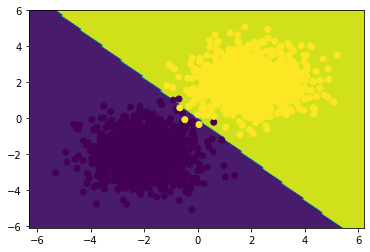

Training Accuracy:  0.9975
Activation function: relu


In [543]:
Y=generateData(1000,'circles',20,'false')
Z=generateData(1000,'twoClusters',20,'false') 
for i in ["sigmoid","relu"]:
  for j in [Y,Z]:
    X=np.insert(j,2,1,axis=1)
    net_obj = neural_net(1)
    w1,w2=net_obj.train(X,3,4,1,i,50000)
    ret_array=net_obj.predict(X,w1,w2,3,4,1,i,1)
    plot_decision(X,w1,w2,4,1,i)
    acc=net_obj.accuracy(ret_array[:,0],X[:,-1])
    print("Training Accuracy: ",acc)
    print("Activation function:", i)

Creating one hot vector of d2_data

In [0]:
a1=np.where(d2_data[:,2]==0,1,0)
a1=np.resize(a1,(1000,1))
a2=np.where(d2_data[:,2]==1,1,0)
a2=np.resize(a2,(1000,1))
hot_vector=np.append(d2_data[:,:2],a1,axis=1)
hot_vector=np.append(hot_vector,a2,axis=1)
print(hot_vector.shape)
print(a1.shape)
print(a2.shape)

(1000, 4)
(1000, 1)
(1000, 1)


In [0]:
np.random.shuffle(hot_vector)

In [0]:
def active_func(method,z):  #checked
    if method=='relu':
      return np.maximum(0,z)
    if method =="leaky relu":
        return np.maximum(0.01*z,z)  #leaky relu
    if method=='sigmoid':
      return 1/(1+np.exp(-z))
    if method=="tanh":
      return 1
    if method=="softmax":
        #print(z)
        #input()
        return np.exp(z-np.max(z))/np.sum(np.exp(z-np.max(z)),axis=0)

In [0]:
def cross_entropy(d,t):
      return -np.sum(t * np.log(d))
    # print(y.shape[0])
    # return (-1/y.shape[0]) * ( y* np.log(t) + (1-y) * np.log(1 - t))

Activation function

In [0]:
b1=np.random.rand(2)
b2=np.random.rand(1)
def train(x,numInput,numHiddenUnits,numOutputs,activationType,numIter):
  
    def deriv_activ_fn(method,h,t=0):
      if method=='sigmoid':
        return (h * (1 - h))
      if method=="relu":
        return np.maximum(0,h)  
      if method =="leaky relu":
        return np.maximum(0.01*h,h)  #leaky relu
      if method=="tanh":
        return 1
      if method=="softmax":
        
        #h=np.array([[1,2,3],[4,5,6],[7,8,9]])
        #print(h.shape)
        #print(h)
        
        #h1 = np.sum(np.exp(h),axis=0)-np.exp(h)
        #h2 = np.exp(h)
        #return np.multiply(h2,h1)
        #return active_func(h) - np.dot(activ_func(h),active_func(h.T))
        #return np.exp(h)* (np.sum(np.exp(h),axis=0)-np.exp(h))
        temp=h.reshape((-1,1))
        #print(np.diagflat(h).shape)
        jacobian_matrix=np.diagflat(h) - np.dot(temp,temp.T)

        jacobian_matrix=np.sum(jacobian_matrix,axis=1,keepdims=1)
        
        deriv=jacobian_matrix.reshape((h.shape[0],h.shape[1]))
        #print("softmax:",deriv)
        #print()
        return deriv
      
    np.random.seed(0)
    w1=np.random.rand(numInput,numHiddenUnits)
    w2=np.random.rand(numHiddenUnits,numOutputs) 
    entropy=0
    for i in range(0,numIter):
        z1=np.dot(x[:,:-1],w1) 
        h1=active_func(activationType,z1) 
        z2=np.dot(h1,w2)
        y=active_func('sigmoid',z2)
        t = (x[:,-1:]).reshape(x.shape[0],1)
        loss= t-y
        d=deriv_activ_fn('sigmoid',y)
        entropy+=cross_entropy(d,t)
        y_ = np.multiply(loss,d)
        w2_=np.dot(h1.T,y_)
        h_=np.dot(y_,w2.T)
        z_=np.multiply(h_,deriv_activ_fn(activationType,z1))
        w1_ = np.dot(x[:,:-1].T,z_)
        w2 = w2 + w2_
        w1 = w1 + w1_
    return w1,w2,loss,entropy

#XOR input
X = np.array([ [0,0,1],[0,1,1],[1,0,1],[1,1,1] ],dtype='float64')
#t = np.array([[1,0,0,1],[0,1,1,0]]).T
t = np.array([[0,1,1,0]]).T
#print(t.shape)
X = np.append(X,t,axis = 1)

w1,w2,loss,entropy=train(X,3,4,1,'relu',10000)     #(x,numInput,numHiddenUnits,numOutputs,activationType,numIter)
print("w1:",w1)
print()
print("w2:",w2)
print()
#print(loss,entropy)

w1: [[-2.26127131 10.45517942  8.28054457 -6.91354532]
 [-2.9031624  -8.37850638  7.30523058  9.15430305]
 [ 6.33843931  2.96038458  0.08604953  3.11423208]]

w2: [[-3.51094246]
 [ 2.73354471]
 [-1.91715147]
 [ 2.64720371]]



<h3>Final copy try and tested</h3>

In [0]:
w1=w1
w2=w2
data=X
#print(w1)
#print(w2)
z1=np.dot(data[:,:-1],w1)
h1=active_func('relu',z1) 
z2=np.dot(h1,w2) 
y=active_func('sigmoid',z2)
#t = (data).reshape(data.shape[0],1)
#print(t)
#print(data)
print(data[:,3:][0:10,:])
#print()
print(y[0:10,:])

#print(sum(y - t))

[[0.]
 [1.]
 [1.]
 [0.]]
[[0.00227723]
 [0.99806565]
 [0.99819847]
 [0.00198063]]


PREDICT ABOVE

In [0]:
def deriv_activ_fn(method,h):
    if method=='sigmoid':
      return (h * (1 - h))
    if method=="relu":
      data=np.where(h<0,0,h)
      data=np.where(data==0,0.5,data)
      data=np.where(data>0,1,data)
      #print(data)
      return data
    if method=="tanh":
      return 1
X = np.array([ [0,0,1],[0,1,1],[1,0,1],[1,1,1] ])
t = np.array([[0,1,1,0]]).T
W1 = 2*np.random.random((3,4)) - 1
W2 = 2*np.random.random((4,1)) - 1
#print(W1.shape)
#print(W2.shape)
for j in range(1000):
  h = active_func('sigmoid',np.dot(X,W1))
  y = active_func('sigmoid',np.dot(h,W2))
  #print(y-t)
  #print((y-t).shape)
  y_delta = (t - y)*deriv_activ_fn('sigmoid',y)
  h_delta = np.dot(y_delta, W2.T) * deriv_activ_fn('sigmoid',h)
  #print(h_delta.shape)
  #print(X.T.shape)
  W2 += np.dot(h.T, y_delta)
  W1 += np.dot(X.T, h_delta)
print(W1,W2)

[[-1.56031433  2.59574336  3.38558895 -5.66913514]
 [-1.49048692  2.49032496  3.40995567 -5.61783856]
 [ 2.29909164  0.36362698 -5.18529841  2.14429775]] [[ 3.06872587]
 [ 2.12429067]
 [-7.03831147]
 [-7.79784702]]


11 lines of code above

In [208]:
X = np.array([ [0,0,1],[0,1,1],[1,0,1],[1,1,1] ])
X=generateData(5000,'circles',0,'false')

#t = np.array([[0,1,1,0]]).T
t = X[:,-1]
t=np.reshape(t,(X.shape[0],1))
W1 = 2*np.random.random((2,4)) - 1
W2 = 2*np.random.random((4,1)) - 1
for j in range(6000):
  h = 1/(1+np.exp(-(np.dot(X[:,:-1],W1))))
  #print(h.shape)
  y = 1/(1+np.exp(-(np.dot(h,W2))))
  #print(y.shape)
  y_delta = (t - y)*(y*(1-y))
  #print(y_delta.shape)
  h_delta = np.dot(y_delta, W2.T) * (h * (1-h))
  #print(h_delta.shape)
  W2 += np.dot(h.T, y_delta)
  #print(h_delta.shape)  
  #print(W1.shape)
  #print(X.shape)
  W1 += np.dot(X[:,:-1].T, h_delta)
plot_decision(X,W1,W2,4,1,'sigmoid')

KeyboardInterrupt: ignored

In [0]:
a=np.array([3,4,1])
print(active_func('softmax',a))

[0.25949646 0.70538451 0.03511903]


In [0]:
a=np.array([1,2,3])
b=np.array([0,1,1])
print(a*np.log(b)+1)

[-inf   1.   1.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
a = np.array([1,2,3,4])
print()
print(a[:a.shape[0]])


[1 2 3 4]


In [451]:
X = np.array([[1,2,3],[4,5,6]])
print(X.shape)
X=np.insert(X,1,5,axis=1)
print(X)

(2, 3)
[[1 5 2 3]
 [4 5 5 6]]
